In [1]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd

In [2]:
nfs_path = "/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/createBranchSeparatorData/axheim_data_MC14_100kEvts/"

In [5]:
fileY4S = uproot.open(nfs_path + "merged_DXstl.root:variables")

In [6]:
names = ["gammas","electrons","pions","kaons","muons"]
dfs = []
for name in names:
    filename="merged_{}.root:variables".format(name)
    print(filename)
    tmpFileFSPs = uproot.open(nfs_path + filename)
    df_tmp = tmpFileFSPs.arrays(library="pd")
    dfs.append(df_tmp)

merged_gammas.root:variables
merged_electrons.root:variables
merged_pions.root:variables
merged_kaons.root:variables
merged_muons.root:variables


In [7]:
df_FSPs = pd.concat(dfs)

In [8]:
df_Y4S = fileY4S.arrays(library="pd")

In [9]:
df_Y4Ssample = df_Y4S.sample(n=500)

In [11]:
df_FSPssample = df_FSPs[df_FSPs['__event__'].isin(df_Y4Ssample["__event__"])]

In [29]:
df_FSPssample.shape[0]

23032

In [28]:
np.array_equal(np.sort(pd.unique(df_FSPssample["__event__"]))[:], np.sort(pd.unique(df_Y4Ssample["__event__"]))[:])

True

## save sample for later reloading and if plots are necessary

In [30]:
df_FSPssample.to_csv(nfs_path + "sampleFSPs.csv")
df_Y4Ssample.to_csv(nfs_path + "sampleYs.csv")

## load df's again

In [3]:
df_FSPssample = pd.read_csv(nfs_path + "sampleFSPs.csv")
df_Y4Ssample = pd.read_csv(nfs_path + "sampleYs.csv")

In [4]:
def has_511(s):
    label = 0
    for i in range(10): 
        genMoth = "genMothPDG_{}".format(i)
        if (int(s[genMoth]) == 511):
            label = 1    
    return label
def has_m511(s):
    label = 0
    for i in range(10): 
        genMoth = "genMothPDG_{}".format(i)
        if (int(s[genMoth]) == -511):
            label = 1    
    return label

In [5]:
df_FSPssample['has_511'] = df_FSPssample.apply(has_511, axis=1)
df_FSPssample['has_m511'] = df_FSPssample.apply(has_m511, axis=1)

In [13]:
df_Y4Ssample["genUp4S_PDG_0_1"].value_counts()

 211.0      46
 13.0       38
-11.0       38
-13.0       38
-211.0      37
 11.0       33
 111.0      20
 113.0      19
 221.0      18
-413.0      17
 223.0      16
-213.0      14
 411.0      12
 213.0      12
-411.0      11
 431.0      11
 321.0      10
 413.0       9
-423.0       7
-321.0       7
-421.0       7
 20213.0     6
-431.0       6
-433.0       6
-20213.0     6
 10431.0     5
 20433.0     5
-20433.0     5
 2212.0      5
 421.0       4
 423.0       4
 433.0       3
 323.0       3
 441.0       3
-10431.0     2
 313.0       2
 331.0       2
-3212.0      1
 333.0       1
-313.0       1
 443.0       1
-4114.0      1
 4222.0      1
-311.0       1
 10441.0     1
 4114.0      1
-2224.0      1
 2224.0      1
-323.0       1
-10313.0     1
Name: genUp4S_PDG_0_1, dtype: int64

In [12]:
df_Y4Ssample["genUp4S_PDG_1_1"].value_counts()

 211.0      44
-211.0      44
-13.0       38
 13.0       35
 11.0       34
 111.0      31
-11.0       26
 113.0      21
 213.0      19
 223.0      19
-413.0      14
 411.0      14
-213.0      14
-433.0      14
 221.0      13
 413.0      11
-431.0      11
-321.0       8
 431.0       7
 421.0       7
-411.0       7
-423.0       6
-10431.0     6
-20213.0     6
-311.0       6
 20213.0     6
-323.0       4
 321.0       4
 331.0       3
-421.0       3
 443.0       3
 433.0       2
-2224.0      2
 313.0       2
-313.0       2
 4224.0      2
 311.0       2
-15.0        2
-2212.0      2
 10431.0     1
 2212.0      1
 20433.0     1
-20433.0     1
 441.0       1
 323.0       1
Name: genUp4S_PDG_1_1, dtype: int64

In [71]:
FSPs_511 = pd.DataFrame({'count' : df_FSPssample.groupby( ["__event__","has_511","has_m511"] ).size()}).reset_index()
#FSPs_511 = pd.DataFrame({'count' : df_FSPssample.groupby( ["has_511","has_m511"] ).size()}).reset_index()

#FSPs_511["__event__"].value_counts()
FSPs_511[FSPs_511["__event__"]==42250868]

,__event__,has_511,has_m511,count
1175,42250868,0,0,14
1176,42250868,0,1,25


In [65]:
df_Y4Ssample["dau0_PDG"].value_counts() 

 511.0    320
-511.0    180
Name: dau0_PDG, dtype: int64

In [68]:
df_Y4Ssample[["dau0_PDG","dau1_mcPDG","genUp4S_PDG_0"]]

,dau0_PDG,dau1_mcPDG,genUp4S_PDG_0
0,511.0,511.0,-511.0
1,-511.0,300553.0,-511.0
2,511.0,NaN,511.0
3,-511.0,NaN,-511.0
4,511.0,NaN,-511.0
...,...,...,...
495,-511.0,300553.0,-511.0
496,511.0,300553.0,511.0
497,511.0,300553.0,-511.0
498,511.0,NaN,511.0


In [56]:
df_Y4Ssample["genUp4S_PDG_1"].value_counts() # mcDaughter pdg NOT one of the B's, mixed instead

-511.0    254
 511.0    246
Name: genUp4S_PDG_1, dtype: int64

In [60]:
df_Y4Ssample["genUp4S_genParticleID_0"].value_counts() 

-1.0    500
Name: genUp4S_genParticleID_0, dtype: int64

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

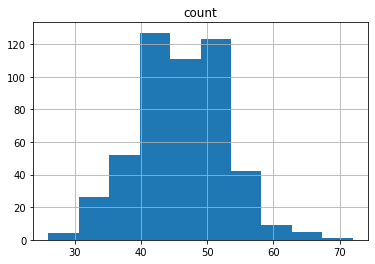

In [36]:
groupsAllFSPs = pd.DataFrame({'count' : df_FSPssample.groupby( ["__event__"] ).size()}).reset_index()
groupsAllFSPs.hist("count")

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

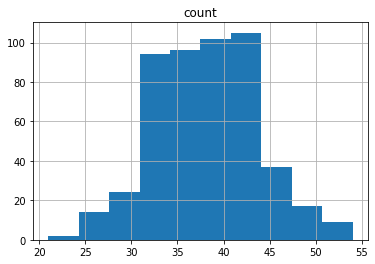

In [37]:
df_FSPssampleCUT = df_FSPssample[df_FSPssample.p > 0.05]
groupsAllFSPsCUT = pd.DataFrame({'count' : df_FSPssampleCUT.groupby( ["__event__"] ).size()}).reset_index()
groupsAllFSPsCUT.hist("count")

In [38]:
df_FSPssample.keys()

Index(['Unnamed: 0', '__experiment__', '__run__', '__event__', '__candidate__',
       '__ncandidates__', '__weight__', 'basf2_X', 'basf2_used', 'basf2_Bsig',
       'isSignal', 'mcErrors', 'mcPDG', 'genMotherID', 'genMotherP',
       'genMotherPDG', 'px', 'py', 'pz', 'pt', 'p', 'E', 'kaonID', 'pionID',
       'genMothPDG_0', 'genMothPDG_1', 'genMothPDG_2', 'genMothPDG_3',
       'genMothPDG_4', 'genMothPDG_5', 'genMothPDG_6', 'genMothPDG_7',
       'genMothPDG_8', 'genMothPDG_9', 'PDG', 'has_511', 'has_m511'],
      dtype='object')

array([[<AxesSubplot:title={'center':'p'}>]], dtype=object)

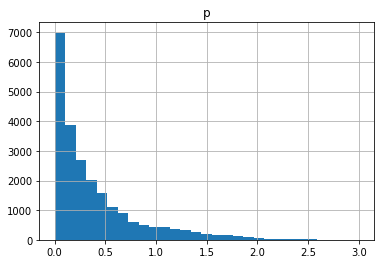

In [39]:
bins = np.linspace(0, 3, 30)
df_FSPssample.hist("p", bins=bins)

In [40]:
groupsAllFSPs = pd.DataFrame({'count' : df_FSPssample.groupby( ["basf2_used","basf2_Bsig","basf2_X"] ).size()}).reset_index()
groupsAllFSPs

,basf2_used,basf2_Bsig,basf2_X,count
0,0.0,0.0,0.0,12184
1,0.0,1.0,0.0,146
2,1.0,0.0,0.0,1952
3,1.0,0.0,1.0,5277
4,1.0,1.0,0.0,3473


In [41]:
df_FSPssample[["basf2_used","basf2_Bsig","basf2_X"]]

,basf2_used,basf2_Bsig,basf2_X
0,1.0,0.0,1.0
1,1.0,0.0,1.0
2,1.0,1.0,0.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
23027,1.0,1.0,0.0
23028,1.0,1.0,0.0
23029,1.0,1.0,0.0
23030,1.0,1.0,0.0


In [42]:
df_FSPssample["__event__"]

0        23898799
1        23898799
2        23898799
3        23898799
4        23898799
           ...   
23027     1179025
23028    29893013
23029    27913841
23030    31847396
23031    35789648
Name: __event__, Length: 23032, dtype: int64

In [43]:
oneEvt=df_FSPssample[df_FSPssample["__event__"]==27913841]
oneEvt.count()

Unnamed: 0         45
__experiment__     45
__run__            45
__event__          45
__candidate__      45
__ncandidates__    45
__weight__         45
basf2_X            45
basf2_used         45
basf2_Bsig         45
isSignal           37
mcErrors           45
mcPDG              37
genMotherID        45
genMotherP         37
genMotherPDG       45
px                 45
py                 45
pz                 45
pt                 45
p                  45
E                  45
kaonID             24
pionID             24
genMothPDG_0       45
genMothPDG_1       45
genMothPDG_2       45
genMothPDG_3       45
genMothPDG_4       45
genMothPDG_5       45
genMothPDG_6       45
genMothPDG_7       45
genMothPDG_8       45
genMothPDG_9       45
PDG                45
has_511            45
has_m511           45
dtype: int64

In [44]:
pd.unique(oneEvt["mcPDG"])

array([  22.,   nan,  -11.,  211.,  321.,  -13., -211., -321.])

In [45]:
oneEvt['absPDG'] = oneEvt['mcPDG'].abs()
pd.DataFrame({'count' : oneEvt.groupby( ['basf2_used','absPDG'] ).size()}).reset_index()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,basf2_used,absPDG,count
0,0.0,11.0,1
1,0.0,13.0,2
2,0.0,22.0,2
3,0.0,211.0,10
4,0.0,321.0,2
5,1.0,13.0,1
6,1.0,22.0,9
7,1.0,211.0,8
8,1.0,321.0,2


In [54]:
#pd.set_option('display.max_columns', None)
genMotherPDGs = []

for i in range(10): 
    tmp_var = "genMothPDG_{}".format(i)
    genMotherPDGs.append(tmp_var)
oneEvt[["mcPDG","has_511","has_m511",*genMotherPDGs]]

,mcPDG,has_511,has_m511,genMothPDG_0,genMothPDG_1,genMothPDG_2,genMothPDG_3,genMothPDG_4,genMothPDG_5,genMothPDG_6,genMothPDG_7,genMothPDG_8,genMothPDG_9
10941,22.0,0,1,111.0,321.0,-421.0,-413.0,-511.0,300553.0,0.0,0.0,0.0,0.0
10942,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10943,22.0,0,1,111.0,321.0,-421.0,-413.0,-511.0,300553.0,0.0,0.0,0.0,0.0
10944,22.0,1,0,111.0,130.0,-421.0,-413.0,511.0,300553.0,0.0,0.0,0.0,0.0
10945,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10946,22.0,0,1,111.0,-321.0,-313.0,411.0,413.0,-511.0,300553.0,0.0,0.0,0.0
10947,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10948,22.0,0,1,111.0,-321.0,-313.0,411.0,413.0,-511.0,300553.0,0.0,0.0,0.0
10949,-11.0,1,0,-13.0,211.0,-421.0,-413.0,511.0,300553.0,0.0,0.0,0.0,0.0
10950,22.0,0,1,111.0,413.0,-511.0,300553.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df_FSPssample[df_FSPssample["__event__"]==42250868][["mcPDG","has_511","has_m511",*genMotherPDGs]]

,mcPDG,has_511,has_m511,genMothPDG_0,genMothPDG_1,genMothPDG_2,genMothPDG_3,genMothPDG_4,genMothPDG_5,genMothPDG_6,genMothPDG_7,genMothPDG_8,genMothPDG_9
7050,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7051,22.0,0,1,-511.0,300553.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7052,22.0,0,1,-433.0,-511.0,300553.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7053,22.0,0,1,111.0,421.0,413.0,-511.0,300553.0,0.0,0.0,0.0,0.0,0.0
7054,22.0,0,1,111.0,223.0,-431.0,-433.0,-511.0,300553.0,0.0,0.0,0.0,0.0
7055,22.0,0,1,111.0,223.0,-431.0,-433.0,-511.0,300553.0,0.0,0.0,0.0,0.0
7056,22.0,0,1,111.0,421.0,413.0,-511.0,300553.0,0.0,0.0,0.0,0.0,0.0
7057,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7058,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7059,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
